# PART 2

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss

In [2]:
# Read the Dataset
df = pd.read_csv("Crime_Incidents_20260128.csv", header=0, low_memory=False)

In [3]:
df.head()

,Case Number,Incident Datetime,Incident ID,Incident Type Primary,Incident Description,Parent Incident Type,Hour of Day,Day of Week,Address,City,...,Census Block Group,Census Block,2010 Census Tract,2010 Census Block Group,2010 Census Block,Police District,TRACTCE20,GEOID20_tract,GEOID20_blockgroup,GEOID20_block
0,26-0180495,2026 Jan 18 03:00:00 AM,NaN,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,15,Sunday,1300 Block HERTEL AV,Buffalo,...,1,1002,49,3,3002,District D,004901,36029004901,360290049011,360290049011002
1,25-3370835,2025 Dec 03 08:30:59 AM,NaN,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,20,Wednesday,1100 Block MICHIGAN AV,Buffalo,...,4,4000,31,4,4000,District B,003100,36029003100,360290031004,360290031004000
2,25-2270290,2025 Aug 15 08:52:15 AM,NaN,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,8,Friday,100 Block HIGHGATE AV,Buffalo,...,3,3002,47,5,5004,District E,004702,36029004702,360290047023,360290047023002
3,25-2140519,2025 Aug 02 12:18:00 PM,NaN,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,12,Saturday,400 Block GRANT ST,Buffalo,...,2,2002,171,2,2002,District D,017100,36029017100,360290171002,360290171002002
4,25-1960592,2025 Jun 15 12:00:46 AM,NaN,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,14,Tuesday,0 Block HAGER ST,Buffalo,...,2,2004,33.01,2,2004,District E,003301,36029003301,360290033012,360290033012004


In [4]:
df.tail()

,Case Number,Incident Datetime,Incident ID,Incident Type Primary,Incident Description,Parent Incident Type,Hour of Day,Day of Week,Address,City,...,Census Block Group,Census Block,2010 Census Tract,2010 Census Block Group,2010 Census Block,Police District,TRACTCE20,GEOID20_tract,GEOID20_blockgroup,GEOID20_block
330703,25-1650456,2025 Jun 14 11:43:39 AM,NaN,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,11,Saturday,200 Block W FERRY ST,Buffalo,...,3,3002,61,3,3002,District B,006100,36029006100,360290061003,360290061003002
330704,25-2300387,2025 Aug 18 11:00:00 AM,NaN,ASSAULT,Buffalo Police are investigating this report o...,Assault,11,Monday,300 Block LANGFIELD DR,Buffalo,...,1,1005,44.02,1,1004,District E,004402,36029004402,360290044021,360290044021005
330705,25-1651026,2025 Jun 13 11:30:27 PM,NaN,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,19,Saturday,800 Block PROSPECT AV,Buffalo,...,1,1009,70,1,2000,District B,007000,36029007000,360290070001,360290070001009
330706,25-2430668,2025 Aug 31 02:00:12 PM,NaN,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,16,Sunday,100 Block LADNER AV,Buffalo,...,2,2004,1.10,4,4004,District A,000110,36029000110,360290001102,360290001102004
330707,25-2440047,2025 Sep 01 12:57:00 AM,NaN,UUV,Buffalo Police are investigating this report o...,Theft of Vehicle,0,Monday,3000 Block MAIN ST,Buffalo,...,3,3001,47,5,5003,District E,004702,36029004702,360290047023,360290047023001


In [5]:
df.dtypes

Case Number                 object
Incident Datetime           object
Incident ID                float64
Incident Type Primary       object
Incident Description        object
Parent Incident Type        object
Hour of Day                  int64
Day of Week                 object
Address                     object
City                        object
State                       object
Location                    object
Latitude                    object
Longitude                   object
Created At                  object
updated_at                 float64
zip_code                    object
neighborhood                object
Council District            object
Council District 2011       object
Census Tract                object
Census Block Group          object
Census Block                object
2010 Census Tract           object
2010 Census Block Group     object
2010 Census Block           object
Police District             object
TRACTCE20                   object
GEOID20_tract       

In the above list of columns, '2010 Census Tract ' has a space at the end of the column

In [6]:
df.shape

(330708, 31)

In [7]:
print('Numerical statistics:')
df.describe(include="all")

Numerical statistics:


,Case Number,Incident Datetime,Incident ID,Incident Type Primary,Incident Description,Parent Incident Type,Hour of Day,Day of Week,Address,City,...,Census Block Group,Census Block,2010 Census Tract,2010 Census Block Group,2010 Census Block,Police District,TRACTCE20,GEOID20_tract,GEOID20_blockgroup,GEOID20_block
count,330708,330708,0.0,330708,330708,330708,330708.000000,330708,330670,330708,...,326954,326954,326954,326954,326954,326954,327091,327091,327091,327091
unique,330708,270167,NaN,22,14,10,NaN,7,22420,1,...,8,245,80,8,289,6,92,92,291,2835
top,26-0180495,2006 Jan 01 12:00:00 AM,NaN,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,NaN,Friday,2100 Block ELMWOOD AV,Buffalo,...,1,1001,UNKNOWN,1,UNKNOWN,District D,016500,36029016500,360290001101,360290019001001
freq,1,54,NaN,143949,321322,146163,NaN,49127,2378,330708,...,117112,12472,16512,98577,16514,77378,15464,15464,95928,10121
mean,NaN,NaN,NaN,NaN,NaN,NaN,11.960627,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,7.147041,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330708 entries, 0 to 330707
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Case Number              330708 non-null  object 
 1   Incident Datetime        330708 non-null  object 
 2   Incident ID              0 non-null       float64
 3   Incident Type Primary    330708 non-null  object 
 4   Incident Description     330708 non-null  object 
 5   Parent Incident Type     330708 non-null  object 
 6   Hour of Day              330708 non-null  int64  
 7   Day of Week              330708 non-null  object 
 8   Address                  330670 non-null  object 
 9   City                     330708 non-null  object 
 10  State                    330708 non-null  object 
 11  Location                 323269 non-null  object 
 12  Latitude                 328548 non-null  object 
 13  Longitude                328548 non-null  object 
 14  Crea

In [9]:
print('Missing values in each column:')
df.isnull().sum()

Missing values in each column:


Case Number                     0
Incident Datetime               0
Incident ID                330708
Incident Type Primary           0
Incident Description            0
Parent Incident Type            0
Hour of Day                     0
Day of Week                     0
Address                        38
City                            0
State                           0
Location                     7439
Latitude                     2160
Longitude                    2160
Created At                 244064
updated_at                 330708
zip_code                     2790
neighborhood                 3754
Council District             2877
Council District 2011        2790
Census Tract                 3754
Census Block Group           3754
Census Block                 3754
2010 Census Tract            3754
2010 Census Block Group      3754
2010 Census Block            3754
Police District              3754
TRACTCE20                    3617
GEOID20_tract                3617
GEOID20_blockg

In [10]:
print('Total number of missing values:', df.isnull().sum().sum())

Total number of missing values: 970234


* This dataset contains crime incident records from Buffalo and is provided by the Buffalo Police Department through Open Data Buffalo.
* It is updated daily and gives a view of crimes that have been reported in the city.
* Each row in the dataset represents one crime incident, and the dataset includes information such as the type of crime, date and time, location (latitude and longitude), neighborhood, and police and council districts.
* The data currently contains more than 331,000 records with 31 columns.
* It includes categorical data (crime type, neighborhood, district,etc.), numerical data (latitude, longitude, year, etc.), and time-based data (day of week, hour of day).
* Some columns contain missing values such as Incident ID, updated_at, and Created At.
* Some location related fields like address, latitude, longitude, and neighborhood also have missing entries.
* These indicate that data cleaning and preprocessing are required before performing analysis or training machine learning models.

In [11]:
actual_numeric_columns = [
    'Hour of Day',
    'Latitude',
    'Longitude',
    'zip_code',
    'Census Tract',
    'Census Block Group',
    'Census Block',
    '2010 Census Tract ',
    '2010 Census Block Group',
    '2010 Census Block',
    'TRACTCE20',
    'GEOID20_tract',
    'GEOID20_blockgroup',
    'GEOID20_block'

]

for column in actual_numeric_columns:
    df[column] = pd.to_numeric(df[column], errors="coerce")


In [12]:
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
categorical_columns = df.select_dtypes(include=["object"]).columns

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)


Numerical columns: Index(['Incident ID', 'Hour of Day', 'Latitude', 'Longitude', 'updated_at',
       'zip_code', 'Census Tract', 'Census Block Group', 'Census Block',
       '2010 Census Tract ', '2010 Census Block Group', '2010 Census Block',
       'TRACTCE20', 'GEOID20_tract', 'GEOID20_blockgroup', 'GEOID20_block'],
      dtype='object')
Categorical columns: Index(['Case Number', 'Incident Datetime', 'Incident Type Primary',
       'Incident Description', 'Parent Incident Type', 'Day of Week',
       'Address', 'City', 'State', 'Location', 'Created At', 'neighborhood',
       'Council District', 'Council District 2011', 'Police District'],
      dtype='object')


In [13]:
# Data Cleaning

# Drop columns which are completely empty or have a large number of null values

columns_to_drop = [
    "Incident ID",
    "Created At",
    "updated_at"
]
df = df.drop(columns=columns_to_drop)

In [14]:
# filling numerical columns with the median values
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())


In [15]:
# filling categorical columns with the mode values
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [16]:
print("Missing values after preprocessing:\n")
print(df.isnull().sum())

Missing values after preprocessing:

Case Number                0
Incident Datetime          0
Incident Type Primary      0
Incident Description       0
Parent Incident Type       0
Hour of Day                0
Day of Week                0
Address                    0
City                       0
State                      0
Location                   0
Latitude                   0
Longitude                  0
zip_code                   0
neighborhood               0
Council District           0
Council District 2011      0
Census Tract               0
Census Block Group         0
Census Block               0
2010 Census Tract          0
2010 Census Block Group    0
2010 Census Block          0
Police District            0
TRACTCE20                  0
GEOID20_tract              0
GEOID20_blockgroup         0
GEOID20_block              0
dtype: int64


In [17]:
# Handle string formatting
for column in categorical_columns:
    df[column] = (
        df[column]
        .astype(str)
        .str.strip()
        .str.lower()
        .str.replace(r'\s+', ' ', regex=True)
    )

In [18]:
# Handle string formatting
placeholders_list = ['unknown', 'na', 'n/a', 'null', 'none', '']
df.replace(placeholders_list, pd.NA, inplace=True)

In [19]:
# Outliers

Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outlier = (df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))

for column in numerical_columns:
    median = df[column].median()
    df.loc[(df[column] < (Q1[column] - 1.5 * IQR[column])) | (df[column] > (Q3[column] + 1.5 * IQR[column])),column] = median

# Visualization

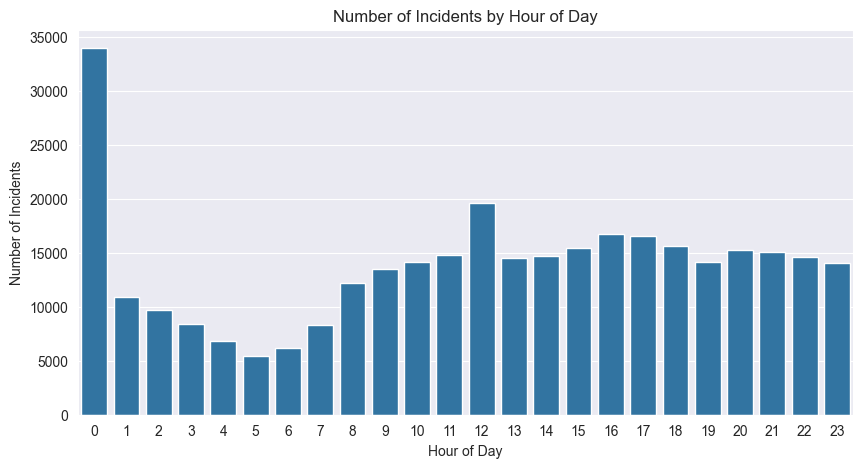

In [20]:
# Visualizations

# Distribution of Incidents by Hour of Day
plt.figure(figsize=(10,5))
sns.countplot(x='Hour of Day', data=df)
plt.title("Number of Incidents by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Incidents")
plt.show()

* The graph shows that incidents are most frequent around midnight, with a noticeable decline during early morning hours (2–6 AM).
* It then increases steadily throughout the day, peaking again in the late afternoon and early evening.
* This indicated that higher crime occurrence during daytime and evenings.

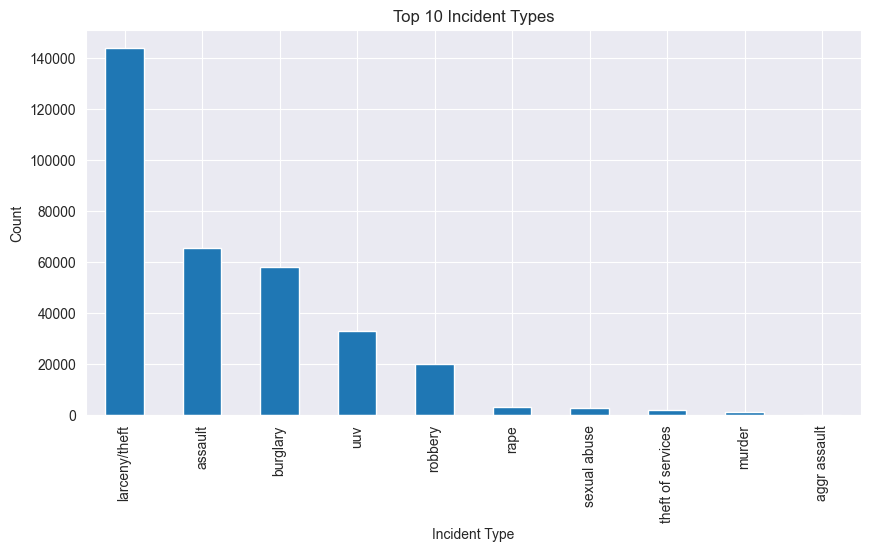

In [21]:
# Top 10 Incident Types:
plt.figure(figsize=(10,5))
df['Incident Type Primary'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Incident Types")
plt.xlabel("Incident Type")
plt.ylabel("Count")
plt.show()

* Larceny/theft is by far the most common incident type, followed by assault and burglary.
* Property-related crimes can be found more in the dataset, while violent crimes such as rape and murder occur far less frequently, indicating a strong class imbalance among incident categories.

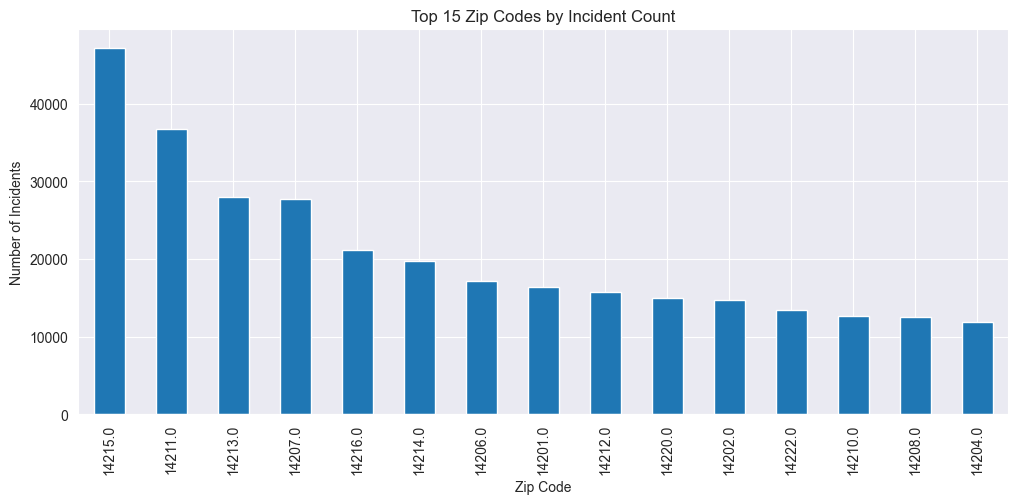

In [22]:
# Distribution of Incidents by Zip Code (Top 15)
plt.figure(figsize=(12,5))
df['zip_code'].value_counts().head(15).plot(kind='bar')
plt.title("Top 15 Zip Codes by Incident Count")
plt.xlabel("Zip Code")
plt.ylabel("Number of Incidents")
plt.show()

* Few of the zip codes have a lot of incidents happening.
* This shows how some of the zip codes have much more crime than others.
* It suggests that location plays a significant role in incident occurrence, with certain areas consistently experiencing higher crime rates than others.

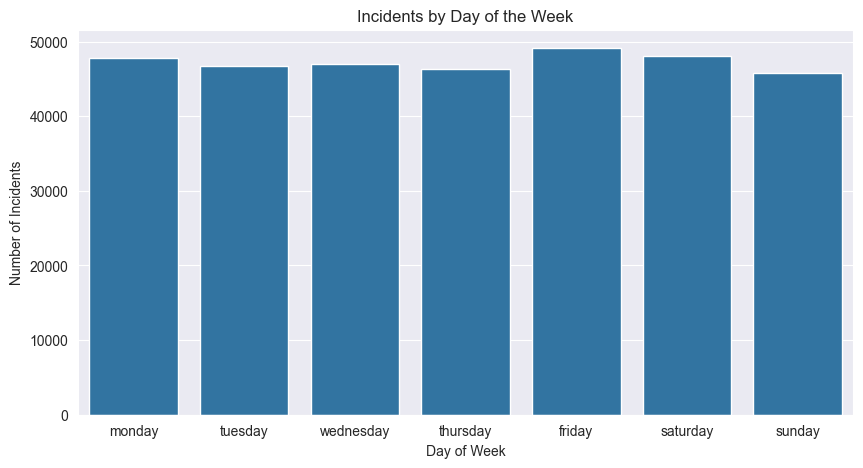

In [23]:
# Incidents by Day of the Week
plt.figure(figsize=(10,5))
sns.countplot(
    x='Day of Week',
    data=df,
    order=['monday','tuesday','wednesday','thursday','friday','saturday','sunday']
)
plt.title("Incidents by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Incidents")
plt.show()

The number of incidents is similar on most days, but it is slightly higher on Fridays and Saturdays. This suggests that more incidents happen toward the end of the week.

/var/folders/s8/b1wvf7sd2rvfvmcpqg487_380000gn/T/ipykernel_50301/1859327451.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Incident Datetime'] = pd.to_datetime(df['Incident Datetime'], errors='coerce')


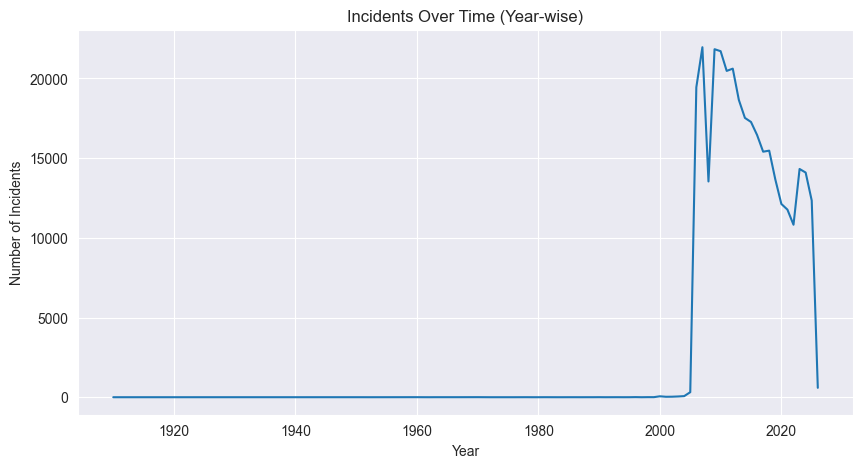

In [24]:
df['Incident Datetime'] = pd.to_datetime(df['Incident Datetime'], errors='coerce')
df['Year'] = df['Incident Datetime'].dt.year

plt.figure(figsize=(10,5))
df['Year'].value_counts().sort_index().plot()
plt.title("Incidents Over Time (Year-wise)")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.show()

* Very few incidents are recorded in earlier years, while there is a sharp increase after the year 2000.
* The number of incidents rises for several years and then slowly decreases, showing a change in crime trends over time.

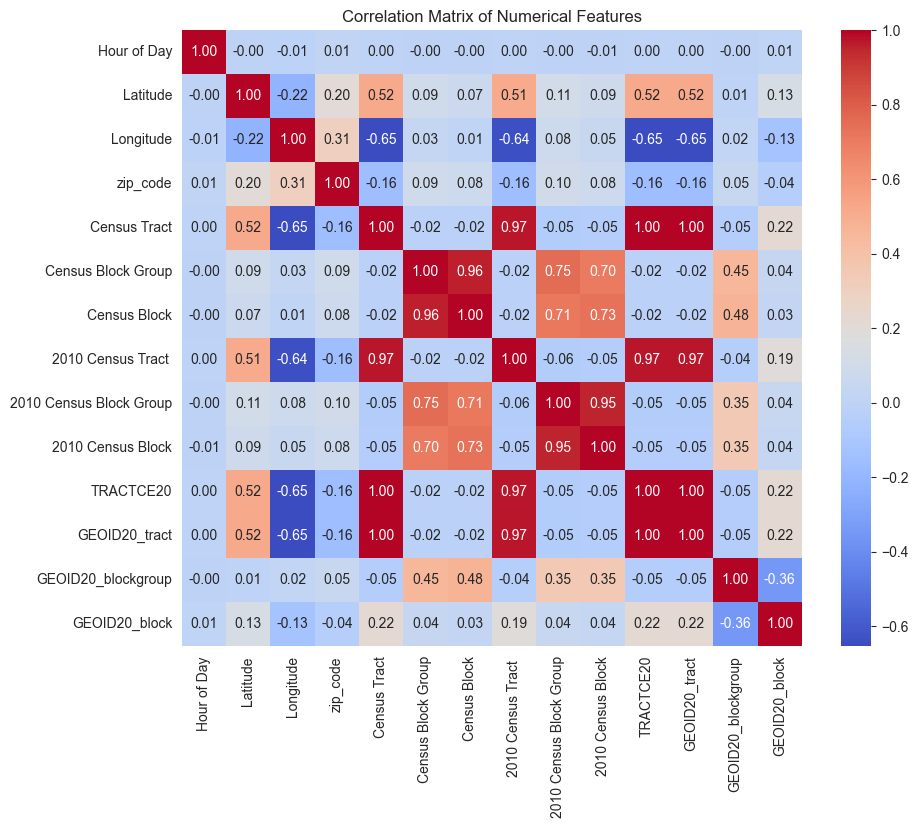

In [25]:
# Feature Engineering
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [26]:
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
categorical_columns = df.select_dtypes(include=["object"]).columns

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)


Numerical columns: Index(['Hour of Day', 'Latitude', 'Longitude', 'zip_code', 'Census Tract',
       'Census Block Group', 'Census Block', '2010 Census Tract ',
       '2010 Census Block Group', '2010 Census Block', 'TRACTCE20',
       'GEOID20_tract', 'GEOID20_blockgroup', 'GEOID20_block'],
      dtype='object')
Categorical columns: Index(['Case Number', 'Incident Type Primary', 'Incident Description',
       'Parent Incident Type', 'Day of Week', 'Address', 'City', 'State',
       'Location', 'neighborhood', 'Council District', 'Council District 2011',
       'Police District'],
      dtype='object')


In [27]:
le = LabelEncoder()
df["target_encoded"] = le.fit_transform(df["Parent Incident Type"])

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

correlation_df = df[numerical_columns.tolist() + ["target_encoded"]]
correlation_matrix = correlation_df.corr()

target_corr = correlation_matrix["target_encoded"].abs()

print("Correlation with target:\n")
print(target_corr)

Correlation with target:

                         target_encoded  target_encoded
Hour of Day                    0.016848        0.016848
Latitude                       0.026077        0.026077
Longitude                      0.086214        0.086214
zip_code                       0.012197        0.012197
Census Tract                   0.076680        0.076680
Census Block Group             0.023127        0.023127
Census Block                   0.022400        0.022400
2010 Census Tract              0.077533        0.077533
2010 Census Block Group        0.037189        0.037189
2010 Census Block              0.036266        0.036266
TRACTCE20                      0.076680        0.076680
GEOID20_tract                  0.076680        0.076680
GEOID20_blockgroup             0.020451        0.020451
GEOID20_block                  0.038676        0.038676
target_encoded                 1.000000        1.000000
target_encoded                 1.000000        1.000000


In [28]:
# Drop redundant features
columns_to_drop = [
    "Census Tract",
    "2010 Census Tract ",
    "TRACTCE20",
    "GEOID20_tract",
    "Census Block",
    "Census Block Group",
    "2010 Census Block",
    "2010 Census Block Group",
    "GEOID20_block",
    "GEOID20_blockgroup",
    "zip_code",
    "Hour of Day"
]

df = df.drop(columns=columns_to_drop)

print("Remaining columns:")
print(df.columns)


Remaining columns:
Index(['Case Number', 'Incident Datetime', 'Incident Type Primary',
       'Incident Description', 'Parent Incident Type', 'Day of Week',
       'Address', 'City', 'State', 'Location', 'Latitude', 'Longitude',
       'neighborhood', 'Council District', 'Council District 2011',
       'Police District', 'Year', 'target_encoded'],
      dtype='object')


In [29]:
columns_to_drop = [
    "Case Number",
    "Incident Datetime",
    "Incident Description",
    "Address",
    "Location",
    "target_encoded"
]

df = df.drop(columns=columns_to_drop)

In [30]:
print(df.columns)

Index(['Incident Type Primary', 'Parent Incident Type', 'Day of Week', 'City',
       'State', 'Latitude', 'Longitude', 'neighborhood', 'Council District',
       'Council District 2011', 'Police District', 'Year'],
      dtype='object')


In [31]:
day_order = {
    'monday': 0,
    'tuesday': 1,
    'wednesday': 2,
    'thursday': 3,
    'friday': 4,
    'saturday': 5,
    'sunday': 6
}

df['Day of Week'] = df['Day of Week'].map(day_order)

In [32]:
categorical_cols = [
    "Incident Type Primary",
    "Day of Week",
    "City",
    "State",
    "neighborhood",
    "Council District",
    "Council District 2011",
    "Police District"
]

df = pd.get_dummies(
    df,
    columns=categorical_cols,
    drop_first=True
)


In [33]:
df.head()

,Parent Incident Type,Latitude,Longitude,Year,Incident Type Primary_aggr assault,Incident Type Primary_assault,Incident Type Primary_breaking & entering,Incident Type Primary_burglary,Incident Type Primary_crim negligent homicide,Incident Type Primary_homicide,...,Council District 2011_masten,Council District 2011_niagara,Council District 2011_north,Council District 2011_south,Council District 2011_unassigned,Council District 2011_university,Police District_district b,Police District_district c,Police District_district d,Police District_district e
0,theft,42.947,-78.859,2026,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,theft,42.903,-78.863,2025,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,theft,42.949,-78.823,2025,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,theft,42.927,-78.890,2025,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,theft,42.921,-78.848,2025,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True


In [34]:
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
print(numerical_columns)

Index(['Latitude', 'Longitude'], dtype='object')


In [35]:
numeric_features_to_normalize = [
    'Latitude',
    'Longitude'
]

for column in numeric_features_to_normalize:
    df[column] = pd.to_numeric(df[column], errors='coerce')

min_max_normalization_values = df[numeric_features_to_normalize].agg(['min', 'max'])
print("Min and Max values for numeric features:")
print(min_max_normalization_values)

#df_normalized = df.copy()

for column in numeric_features_to_normalize:
    min_val = df[column].min()
    max_val = df[column].max()
    df[column] = (df[column] - min_val) / (max_val - min_val)

print(df[numeric_features_to_normalize].describe())

Min and Max values for numeric features:
     Latitude  Longitude
min    42.833    -78.912
max    42.996    -78.740
            Latitude      Longitude
count  330708.000000  330708.000000
mean        0.483774       0.361306
std         0.172130       0.180125
min         0.000000       0.000000
25%         0.374233       0.203488
50%         0.490798       0.366279
75%         0.625767       0.523256
max         1.000000       1.000000


In [36]:
df.columns

Index(['Parent Incident Type', 'Latitude', 'Longitude', 'Year',
       'Incident Type Primary_aggr assault', 'Incident Type Primary_assault',
       'Incident Type Primary_breaking & entering',
       'Incident Type Primary_burglary',
       'Incident Type Primary_crim negligent homicide',
       'Incident Type Primary_homicide', 'Incident Type Primary_larceny/theft',
       'Incident Type Primary_manslaughter', 'Incident Type Primary_murder',
       'Incident Type Primary_other sexual offense',
       'Incident Type Primary_rape', 'Incident Type Primary_robbery',
       'Incident Type Primary_sexual abuse',
       'Incident Type Primary_sexual assault', 'Incident Type Primary_sodomy',
       'Incident Type Primary_theft',
       'Incident Type Primary_theft of services',
       'Incident Type Primary_theft of vehicle', 'Incident Type Primary_uuv',
       'Day of Week_1', 'Day of Week_2', 'Day of Week_3', 'Day of Week_4',
       'Day of Week_5', 'Day of Week_6', 'neighborhood_black roc

In [37]:
#11
y = df["Parent Incident Type"]
y = le.fit_transform(y)
X = df.drop(columns=["Parent Incident Type"])

In [38]:
pd.Series(y).value_counts()

8    146163
0     65937
1     58348
9     32983
4     19981
5      2497
3      2241
6      1434
2      1122
7         2
Name: count, dtype: int64

In [39]:
#train test split
# The data is first split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [40]:
# train validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.25,
    random_state=42,
    stratify=y_train
)

#final data split : 60% training, 20% validation, and 20% test split

In [41]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

print("X_validation shape:", X_val.shape)
print("y_validation shape:", y_val.shape)


X_train shape: (198424, 84)
y_train shape: (198424,)
X_test shape: (66142, 84)
y_test shape: (66142,)
X_validation shape: (66142, 84)
y_validation shape: (66142,)


In [42]:
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (198424, 84) (198424,)
Validation set: (66142, 84) (66142,)
Test set: (66142, 84) (66142,)


In [43]:
X_train = X_train.astype(float)
X_val   = X_val.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_val = y_val.astype(float)
y_test = y_test.astype(float)

# STEP 2

In [44]:
class CrimeNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(CrimeNN, self).__init__()

        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


### Neural Network Model Description

* A feedforward neural network was used to model the crime dataset.
* It consists of:
    * An input layer matching the number of input features
    * Two fully connected hidden layers with 128 and 64 neurons
    * Each of these layers use ReLU activation
    * An output layer with multiple neurons, one for each class in the target variable, enabling multiclass classification
    * The model was trained using Cross-Entropy loss, which internally applies the softmax function.
    * The model is optimized with the Adam optimizer.

In [45]:
# Hyperparameters
epochs = 20
batch_size = 64
learning_rate = 0.001

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

X_validation_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_validation_tensor = torch.tensor(y_val, dtype=torch.long)


In [46]:
# DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
validation_dataset = TensorDataset(X_validation_tensor, y_validation_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [47]:
input_dim = X_train.shape[1]
num_classes = len(np.unique(y_train))

model = CrimeNN(input_dim, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [53]:
best_val_loss = float("inf")
best_model_path = "crime_data_model_weights.pkl"

start_time = time.time()

for epoch in range(epochs):
    model.train()
    train_loss = 0.0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in validation_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()

    val_loss /= len(validation_loader)

    # Save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), best_model_path)

    print(
        f"Epoch [{epoch+1}/{epochs}] "
        f"Train Loss: {train_loss:.4f} | "
        f"Validation Loss: {val_loss:.4f}"
    )

end_time = time.time()
training_time = end_time - start_time

print(f"\nTraining Time: {training_time:.2f} seconds")
print(f"Best Validation Loss: {best_val_loss:.4f}")


Epoch [1/20] Train Loss: 0.0350 | Validation Loss: 0.0122
Epoch [2/20] Train Loss: 0.0124 | Validation Loss: 0.0111
Epoch [3/20] Train Loss: 0.0330 | Validation Loss: 0.0121
Epoch [4/20] Train Loss: 0.0222 | Validation Loss: 0.0120
Epoch [5/20] Train Loss: 0.0224 | Validation Loss: 0.0148
Epoch [6/20] Train Loss: 0.0168 | Validation Loss: 0.0118
Epoch [7/20] Train Loss: 0.0113 | Validation Loss: 0.0191
Epoch [8/20] Train Loss: 0.0218 | Validation Loss: 0.0110
Epoch [9/20] Train Loss: 0.0175 | Validation Loss: 0.0109
Epoch [10/20] Train Loss: 0.0109 | Validation Loss: 0.0150
Epoch [11/20] Train Loss: 0.0207 | Validation Loss: 0.0110
Epoch [12/20] Train Loss: 0.0132 | Validation Loss: 0.0105
Epoch [13/20] Train Loss: 0.0363 | Validation Loss: 0.0121
Epoch [14/20] Train Loss: 0.0160 | Validation Loss: 0.0113
Epoch [15/20] Train Loss: 0.0231 | Validation Loss: 0.0109
Epoch [16/20] Train Loss: 0.0109 | Validation Loss: 0.0106
Epoch [17/20] Train Loss: 0.0164 | Validation Loss: 0.0111
Epoch 

In [54]:
#Load the saved best model
best_model = CrimeNN(input_dim, num_classes)
best_model.load_state_dict(torch.load(best_model_path))
best_model.eval()


CrimeNN(
  (fc1): Linear(in_features=84, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [55]:
with torch.no_grad():
    outputs = best_model(X_test_tensor)
    nn_test_loss = criterion(outputs, y_test_tensor).item()
    predictions = torch.argmax(outputs, dim=1)
    test_accuracy = (predictions == y_test_tensor).float().mean().item()

print(f"Neural Network Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Neural Network Test Loss: {nn_test_loss:.4f}")


Neural Network Test Accuracy: 99.56%
Neural Network Test Loss: 0.0104


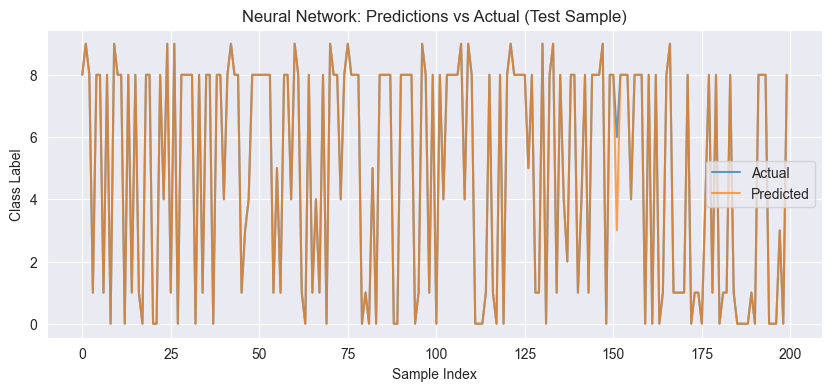

In [56]:
plt.figure(figsize=(10, 4))
plt.plot(y_test_tensor[:200].numpy(), label="Actual", alpha=0.7)
plt.plot(predictions[:200].numpy(), label="Predicted", alpha=0.7)
plt.title("Neural Network: Predictions vs Actual (Test Sample)")
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.legend()
plt.show()


In [61]:
start = time.time()
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_time = time.time() - start

lr_test_preds = lr.predict(X_test)
lr_test_proba = lr.predict_proba(X_test)

lr_test_acc = accuracy_score(y_test, lr_test_preds)

all_classes = np.unique(y_train)
lr_test_loss = log_loss(y_test, lr_test_proba, labels=all_classes)

print(f"Logistic Regression Test Accuracy: {lr_test_acc:.4f}")
print(f"Logistic Regression Test Loss: {lr_test_loss:.4f}")
print(f"Training Time: {lr_time:.2f} seconds")


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/L

Logistic Regression Test Accuracy: 0.9956
Logistic Regression Test Loss: 0.0115
Training Time: 25.69 seconds


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Pytho

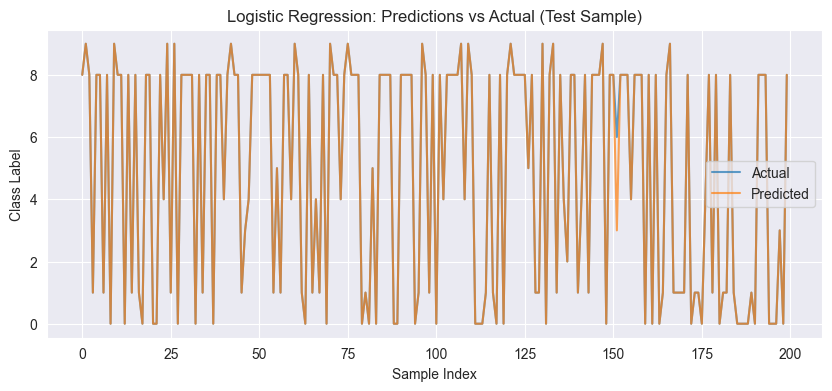

In [62]:
plt.figure(figsize=(10, 4))
plt.plot(y_test[:200], label="Actual", alpha=0.7)
plt.plot(lr_test_preds[:200], label="Predicted", alpha=0.7)
plt.title("Logistic Regression: Predictions vs Actual (Test Sample)")
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.legend()
plt.show()

In [64]:
start = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_time = time.time() - start

rf_test_preds = rf.predict(X_test)
rf_test_proba = rf.predict_proba(X_test)

# Test accuracy
rf_test_acc = accuracy_score(y_test, rf_test_preds)

all_classes = np.unique(y_train)
rf_test_loss = log_loss(y_test, rf_test_proba, labels=all_classes)

print(f"Random Forest Test Accuracy: {rf_test_acc:.4f}")
print(f"Random Forest Test Loss: {rf_test_loss:.4f}")
print(f"Training Time: {rf_time:.2f} seconds")


Random Forest Test Accuracy: 0.9998
Random Forest Test Loss: 0.0063
Training Time: 4.55 seconds


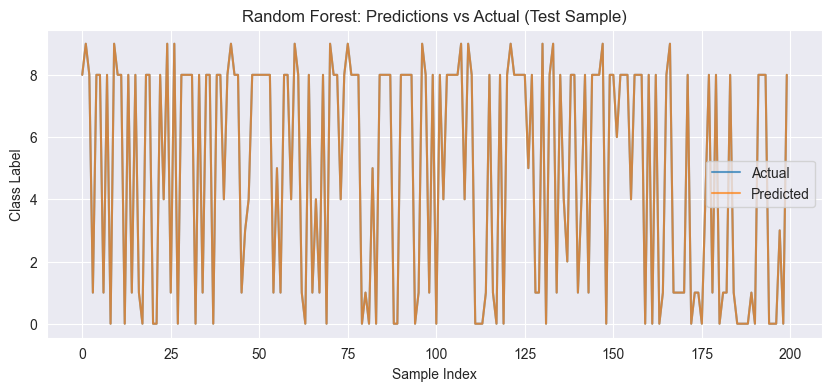

In [65]:
plt.figure(figsize=(10, 4))
plt.plot(y_test[:200], label="Actual", alpha=0.7)
plt.plot(rf_test_preds[:200], label="Predicted", alpha=0.7)
plt.title("Random Forest: Predictions vs Actual (Test Sample)")
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.legend()
plt.show()

In [66]:
results = pd.DataFrame({
    "Model": ["Neural Network", "Logistic Regression", "Random Forest"],
    "Test Accuracy": [test_accuracy, lr_test_acc, rf_test_acc],
    "Test Loss": [nn_test_loss, lr_test_loss, rf_test_loss],
    "Training Time": [training_time, lr_time, rf_time],
})

print(results)


                 Model  Test Accuracy  Test Loss  Training Time
0       Neural Network       0.995631   0.010445      25.127847
1  Logistic Regression       0.995631   0.011461      25.694113
2        Random Forest       0.999834   0.006263       4.554465


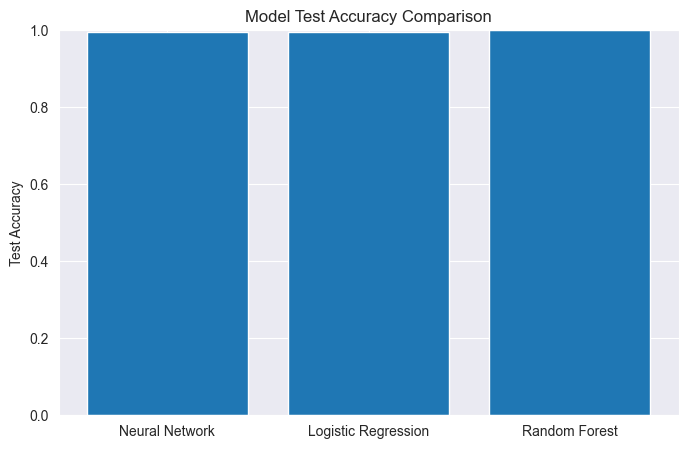

In [67]:
plt.figure(figsize=(8, 5))
plt.bar(results["Model"], results["Test Accuracy"])
plt.title("Model Test Accuracy Comparison")
plt.ylabel("Test Accuracy")
plt.ylim(0, 1)
plt.show()


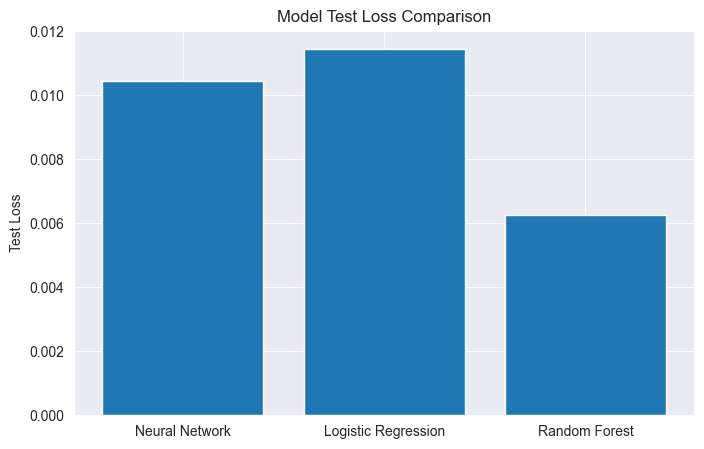

In [68]:
plt.figure(figsize=(8, 5))
plt.bar(results["Model"], results["Test Loss"])
plt.title("Model Test Loss Comparison")
plt.ylabel("Test Loss")
plt.show()


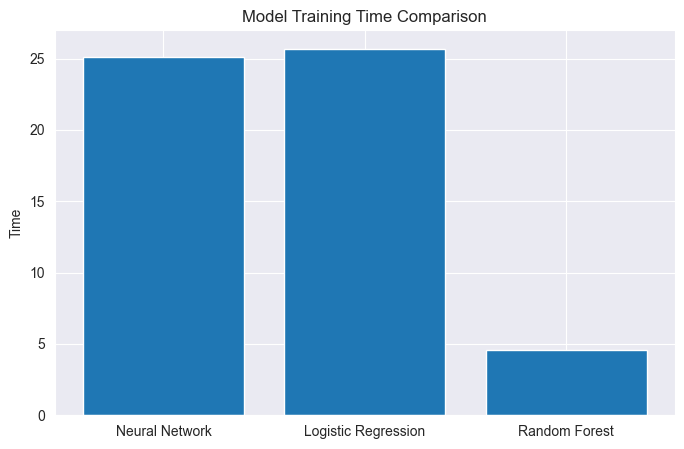

In [70]:
plt.figure(figsize=(8, 5))
plt.bar(results["Model"], results["Training Time"])
plt.title("Model Training Time Comparison")
plt.ylabel("Time")
plt.show()


* All models perform very well with test accuracy above 99%.
* Random Forest model performs the best overall having the highest accuracy, lowest loss, and fastest training time.
* The Neural Network and Logistic Regression model have similar accuracy, but the Neural Network has slightly lower loss.
* Overall, Random Forest is the most efficient model, and the Neural Network also has a great accuracy

# REFERENCES

1. https://pandas.pydata.org/docs/
2. https://numpy.org
3. https://matplotlib.org/stable/index.html
4. https://scikit-learn.org/stable/supervised_learning.html
5. https://scikit-learn.org/stable/modules/preprocessing.html
6. https://www.geeksforgeeks.org/python/introduction-to-seaborn-python/
7. https://seaborn.pydata.org
8. https://docs.pytorch.org/docs/stable/nn.html
9. https://www.geeksforgeeks.org/python/python-time-module/
10. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
11. https://docs.pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
12. https://docs.pytorch.org/docs/stable/generated/torch.optim.Adam.html